In [ ]:
import tensorflow as tf

x = tf.random.uniform(shape=(1,10), minval=0, maxval=10)

In [ ]:
from tensorflow.keras.layers import Dense

n_neuron = 1
activation = 'sigmoid'

dense = Dense(units=n_neuron, activation=activation)
output = dense(x)

print(f"output shape : {output.shape}, output : {output.numpy()}")


output shape : (1, 1), output : [[1.]]


In [ ]:
from tensorflow.math import maximum, exp
from tensorflow.linalg import matmul

w,b = dense.get_weights()

z = matmul(x,w) + b
# z = maximum(0, z)
z = 1 / (1 + exp(-z))

print(z.numpy())

[[1.]]


In [ ]:
import numpy as np

neuron_list = [3, 5]

N = 4
n_feature = 10
x = tf.random.normal(shape=(N, n_feature))
x_cp = tf.identity(x)
x_cp2 = tf.identity(x)
print(f"x.shape : {x.shape}, \n x : \n {x.numpy()}\n")


activation_list = ['sigmoid', 'relu']


dense_list = []
for i, n_neuron in enumerate(neuron_list):
  dense = Dense(units=n_neuron, activation=activation_list[i])
  dense_list.append(dense)


W, B = list(), list()
for dense_layer in dense_list:
  x = dense_layer(x)
  w,b = dense_layer.get_weights()
  W.append(w)
  B.append(b)
  print(f"x.shape : {x.shape}, \n x : \n {x.numpy()}\n")



# matrix multiplication method
A1 = matmul(x_cp,W[0])+B[0]
A1 = 1 / (1 + exp(-A1))
Y = matmul(A1, W[1])+B[1]
Y = maximum(0, Y)
print(f"Y(matrix multiplication) : \n{Y.numpy()}\n")


Y_list = list()
for d_idx in range(len(dense_list)):

  A1 = np.zeros(shape=(N, neuron_list[d_idx]))
  w, b = W[d_idx], B[d_idx]
  neurons = neuron_list[d_idx]

  for x_idx in range(N):

    for n_idx in range(neurons):

        y = tf.reduce_sum(x_cp2[x_idx]*w[:, n_idx]) + b[n_idx]

        if activation_list[d_idx] == 'sigmoid':
          y = 1 / (1+exp(-y))
        elif activation_list[d_idx] == 'relu':
          y = maximum(0, y)

        A1[x_idx][n_idx] = y

  x_cp2 = A1
  Y_list.append(A1)

print("Y(dot) : \n", Y_list[-1])


x.shape : (4, 10), 
 x : 
 [[ 0.40843526  0.27856144 -0.07985847  0.7300933  -0.59738195  0.87454545
   1.2815667   0.1931054   0.01221166 -1.9960052 ]
 [ 0.81684154  0.08600932 -0.4306037  -1.089334   -1.7354542   0.6189138
  -0.20908935 -0.07418281  1.0435649  -1.5225492 ]
 [-0.47319195  1.1070685  -0.4210997   1.202018   -0.13208903 -0.37994972
  -0.8876109  -1.2053462   0.5715456   2.1331801 ]
 [-1.7251545  -0.711005    1.3656584  -1.0126305  -0.04890054 -1.2987255
  -2.1027298  -0.17633323 -1.6459647  -0.08659296]]

x.shape : (4, 3), 
 x : 
 [[0.5682052  0.5043185  0.3435744 ]
 [0.5677356  0.36497802 0.22355847]
 [0.41004968 0.37418875 0.8475684 ]
 [0.34392405 0.7844559  0.21519881]]

x.shape : (4, 5), 
 x : 
 [[0.         0.14262599 0.57658184 0.         0.        ]
 [0.04858238 0.17060004 0.49834964 0.         0.        ]
 [0.         0.         0.2576271  0.12677814 0.        ]
 [0.         0.25344428 0.72997797 0.2186855  0.        ]]

Y(matrix multiplication) : 
[[0.         

In [ ]:
tf.math.equal(x.numpy(), Y.numpy(), Y_list[-1])

<tf.Tensor: shape=(4, 5), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True],
       [False, False, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True, False,  True]])>

# 2-3:Model Implementation

### Code.2-3-1: Model Implementation with Sequential Method

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

n_neurons = [3,4,5,6]

model = list()
for n in n_neurons:
  model.append(Dense(units=n, activation='sigmoid'))

model = Sequential()
for n in n_neurons:
  model.add(Dense(units=n, activation='sigmoid'))


### Code.2-3-2:Model Implementation with Model-subclassing

In [ ]:
# class 복습
# class Animal:

#   def sound(self):
#     print('소리를 낸다.')

# class Dog(Animal):
#   # 오버라이딩
#   def sound(self):
#     print('멍멍')

# d = Dog()
# d.sound()


# class 복습 (2)
class Animal:
  def __init__(self, name):
    self.name = name

class Dog(Animal):
  def __init__(self, name, breed):
    super().__init__(name)     # 부모클래스의 __init__메서드 호출
    self.breed = breed

d = Dog('쫑이', '진돗개')
print(d.name)
print(d.breed)


쫑이
진돗개


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

class TestModel(Model):
  def __init__(self):
    super(TestModel, self).__init__()    # Model에 있는 __init__ 메서드를 그대로 가져와서 쓰겠다.

    self.dense1 = Dense(units = 10, activation = 'sigmoid')
    self.dense2 = Dense(units = 20, activation = 'sigmoid')

model = TestModel()
print(model.dense1)
print(model.dense2)


### Code.2-3-3:Forward Propagation of Models

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model


X = tf.random.normal(shape=(4, 10))


# Sequential Method
model = Sequential()
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))

Y = model(X)
print(f"Y(Sequential) : \n{Y.numpy()} \n")


# Model Sub-classing Method
class TestModel(Model):
  def __init__(self):
    super(TestModel, self).__init__()

    self.dense1 = Dense(units=10, activation='sigmoid')
    self.dense2 = Dense(units=20, activation='sigmoid')

  def call(self, x):
    x = self.dense1(x)
    x = self.dense2(x)
    return x

model2 = TestModel()
Y2 = model2(X)
print(f"Y(Model Sub-Classing) : \n {Y2.numpy()}")

# 모델 선언할 때 random parameter init 값이 다르기때문에 결과값이 다르게 나올 수 있다.


# Model Sub-classing Method 2
class TestModel(Model):
  def __init__(self, n_neurons):
    super(TestModel, self).__init__()
    self.n_neurons = n_neurons

    self.model = Sequential()
    for n_feature in n_neurons:
      self.model.add(Dense(units=n, activation='sigmoid'))

  def call(self, x):
    x = self.model(x)
    return x

n_neurons = [3,4,5,6]
model3 = TestModel(n_neurons)
model3.n_neurons

Y(Sequential) : 
[[0.3713131  0.59232426 0.4819356  0.4202728  0.5547379  0.5992129
  0.5375837  0.36283943 0.4259932  0.64011633 0.4499045  0.4148247
  0.54461944 0.3718588  0.44256157 0.5273854  0.49398157 0.5372367
  0.37908328 0.5685842 ]
 [0.40189606 0.64970714 0.39498726 0.49843884 0.5431454  0.6575828
  0.498839   0.40632126 0.47209722 0.65985197 0.5260524  0.3571455
  0.51480305 0.39346483 0.41519952 0.5642192  0.54930675 0.5498267
  0.44400135 0.54158425]
 [0.39414057 0.6232572  0.39246666 0.48774105 0.5389944  0.65210754
  0.49510315 0.4000652  0.48659155 0.6344636  0.5163472  0.36698058
  0.52174777 0.40019828 0.38739052 0.58138764 0.548857   0.56832224
  0.43362316 0.52754563]
 [0.46042368 0.59233135 0.39597014 0.50868714 0.5083041  0.6057073
  0.50594026 0.40172142 0.46741644 0.5997095  0.5416318  0.38836354
  0.5279101  0.41517782 0.40517458 0.5787522  0.54674995 0.51127684
  0.46550518 0.5363689 ]] 

Y(Model Sub-Classing) : 
 [[0.4951779  0.5765221  0.5277545  0.5231394 

ListWrapper([3, 4, 5, 6])

### Code.2-3-4:Layers in Models

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential

X = tf.random.normal(shape=(3, 4))

model = Sequential()
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))

Y = model(X)

# print(type(model.layers))
# print(model.layers)

dense1 = model.layers[0]
for tmp in dir(dense1):
  print(tmp)

_TF_MODULE_IGNORED_PROPERTIES
__annotations__
__call__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setstate__
__sizeof__
__str__
__subclasshook__
__weakref__
_activity_regularizer
_add_trackable
_add_trackable_child
_add_variable_with_custom_getter
_auto_config
_auto_get_config
_auto_track_sub_layers
_autocast
_autographed_call
_build_input_shape
_call_spec
_callable_losses
_captured_weight_regularizer
_cast_single_input
_checkpoint_dependencies
_clear_losses
_compute_dtype
_compute_dtype_object
_dedup_weights
_deferred_dependencies
_delete_tracking
_deserialization_dependencies
_deserialize_from_proto
_dtype
_dtype_policy
_dynamic
_eager_losses
_expects_mask_arg
_expects_training_arg
_export_to_saved_model_graph
_flatten
_flatten_layers
_flatten_modules
_functional_construction_call
_gather_children

### Code.2-3-5:Trainable Variables in Models

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


X = tf.random.normal(shape=(3, 4))

model = Sequential()
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=20, activation='sigmoid'))

Y = model(X)

print(type(model.trainable_variables))

for train_var in model.trainable_variables:
  print(type(train_var))
  print(train_var.shape)    # trainable_variables = weight, bias를 의미하는 것


<class 'list'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(4, 10)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(10,)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(10, 20)
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
(20,)


# 3-1: The Graphs of Odds, Logit and Sigmoid

### Code.3-1-1: The Graphs of Odds and Logit

<ipython-input-49-4f745ac3c0d5>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Logit')

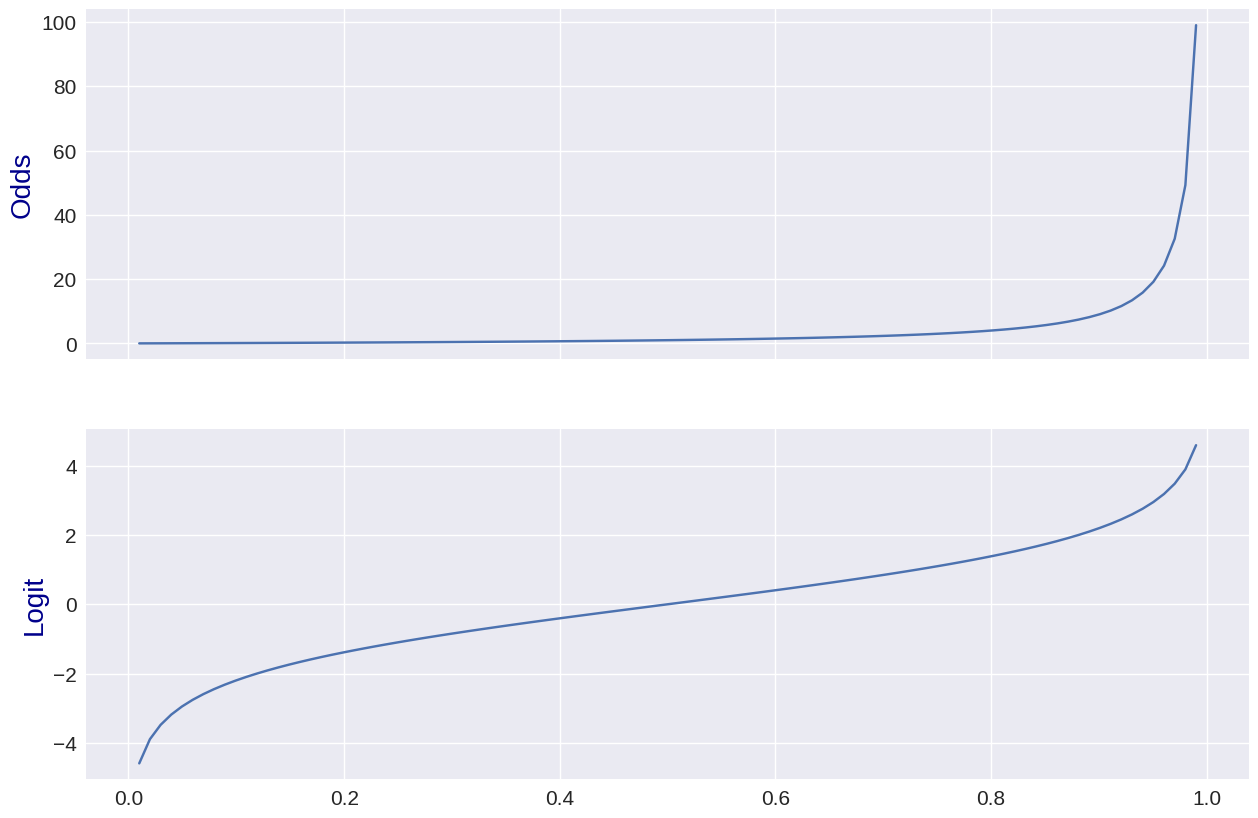

In [ ]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('seaborn')

p_np = np.linspace(0.01, 0.99, 100)
p_tf = tf.linspace(0.01, 0.99, 100)

# print(p_np)
# print(p_tf)

odds_np = p_np / (1 - p_np)
odds_tf = p_tf / (1 - p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True)
axes[0].plot(p_np, odds_np)   # x, y
axes[1].plot(p_np, logit_np)

xticks = np.arange(0, 1.1, 0.2)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')

### Code.3-1-2: The Graphs of Sigmoid

Text(0, 0.5, 'Sigmoid')

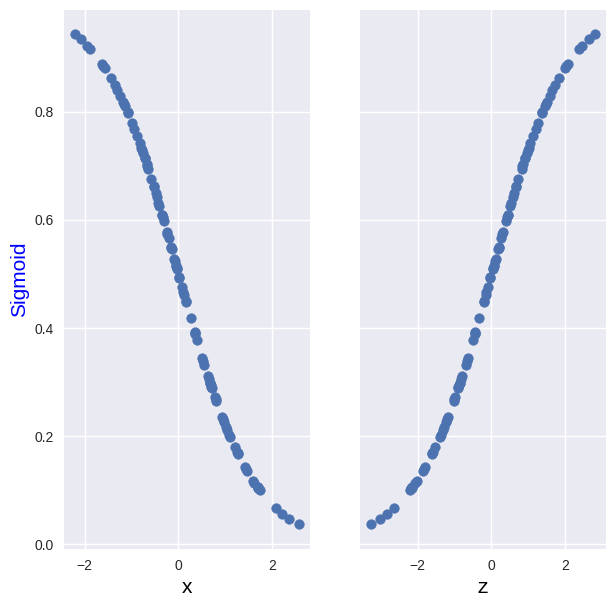

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.math import exp

x_tf = tf.random.normal(shape=(100,1))

dense = Dense(units=1, activation='linear')
z = dense(x_tf)

a = 1 / (1+exp(-z))

fig, axes = plt.subplots(1, 2, figsize=(7,7), sharey=True)
axes[0].scatter(x_tf, a)
axes[1].scatter(z, a)

axes[0].set_xlabel('x', fontsize=15, color='black')
axes[1].set_xlabel('z', fontsize=15, color='black')

axes[0].set_ylabel('Sigmoid', fontsize=15, color='blue')


### Code. 3-1-3: The Graphs of tanh

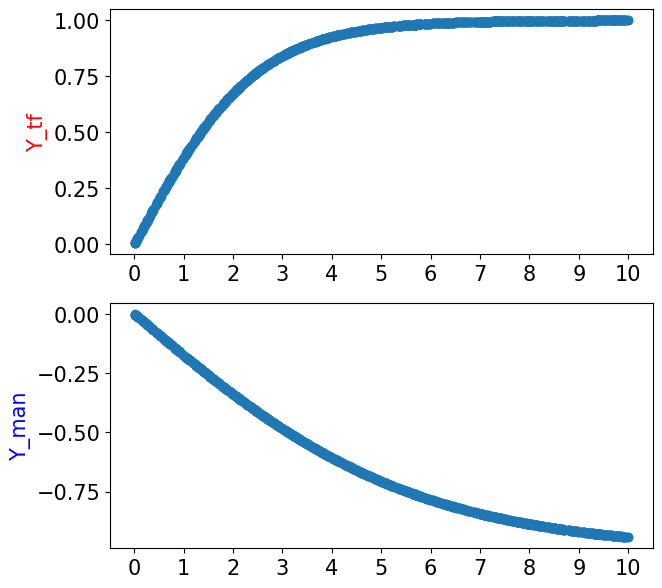

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.math import exp
from tensorflow.linalg import matmul
import numpy as np


X = tf.random.uniform(shape=(1000, 1), minval=0, maxval=10)

# 1. manual
dense = Dense(units=1)
z = dense(X)
w, b = dense.get_weights()
Y_man = matmul(X, w) + b
Y_man = (exp(Y_man) - exp(-Y_man)) / (exp(Y_man)+exp(-Y_man))

# 질문! 위의 w,b를 아래의 tensorflow kernel_initializer, bias_initializer로 set은 어떻게 할 수 있나?
# 2. tensorflow
dense = Dense(units=1, activation='tanh')
Y_tf = dense(X)


fig, axes = plt.subplots(2, 1, figsize=(7, 7))
axes[0].scatter(X, Y_tf)
axes[1].scatter(X, Y_man)

xticks = np.arange(0, 11, 1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Y_tf', fontsize=15, color='red')

axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Y_man', fontsize=15, color='blue')

plt.show()

## Question : 위의 w,b를 아래의 tensorflow kernel_initializer, bias_initializer로 set은 어떻게 할 수 있나?

## Answer : kernel_initializer, bias_initializer 메서드를 사용하시면 돼요!

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


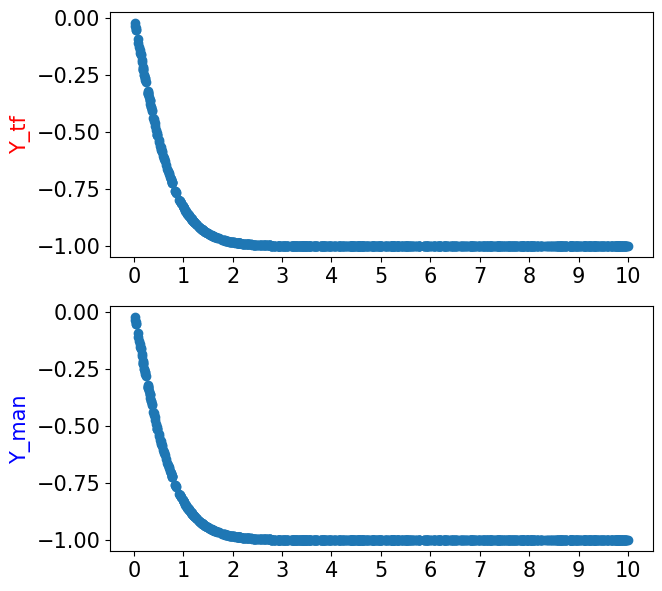

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.math import exp
from tensorflow.linalg import matmul
import numpy as np


X = tf.random.uniform(shape=(1000, 1), minval=0, maxval=10)

# 1. manual
dense_man = Dense(units=1)
z = dense_man(X)
w_man, b_man = dense_man.get_weights()
Y_man = matmul(X, w_man) + b_man
Y_man = (exp(Y_man) - exp(-Y_man)) / (exp(Y_man)+exp(-Y_man))

# 2. tensorflow
dense_tf = Dense(units=1, activation='tanh', kernel_initializer=dense_man.kernel_initializer, bias_initializer=dense_man.bias_initializer) # 새롭게 추가된 코드
Y_tf = dense_tf(X)


fig, axes = plt.subplots(2, 1, figsize=(7, 7))
axes[0].scatter(X, Y_tf)
axes[1].scatter(X, Y_man)

xticks = np.arange(0, 11, 1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Y_tf', fontsize=15, color='red')

axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Y_man', fontsize=15, color='blue')

plt.show()

## 두번째 방법 : set_weights 메서드

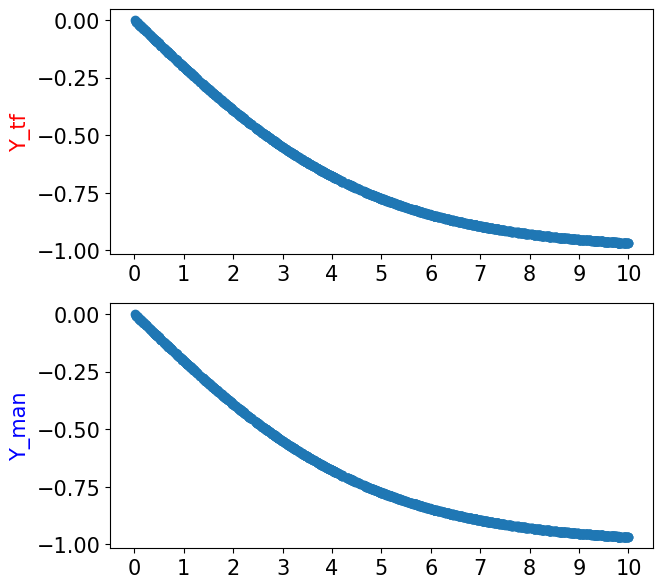

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.math import exp
from tensorflow.linalg import matmul
import numpy as np


X = tf.random.uniform(shape=(1000, 1), minval=0, maxval=10)

# 1. manual
dense_man = Dense(units=1)
z = dense_man(X)
w_man, b_man = dense_man.get_weights()
Y_man = matmul(X, w_man) + b_man
Y_man = (exp(Y_man) - exp(-Y_man)) / (exp(Y_man)+exp(-Y_man))

# 2. tensorflow
dense_tf = Dense(units=1, activation='tanh')
dense_tf(X) # 새로운 코드
dense_tf.set_weights([w_man, b_man])  # 새로운 코드
Y_tf = dense_tf(X) # 새로운 코드
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
axes[0].scatter(X, Y_tf)
axes[1].scatter(X, Y_man)

xticks = np.arange(0, 11, 1)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Y_tf', fontsize=15, color='red')

axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Y_man', fontsize=15, color='blue')

plt.show()

### Code. 3-1-4: The Graphs of ReLU

Text(0, 0.5, 'relu')

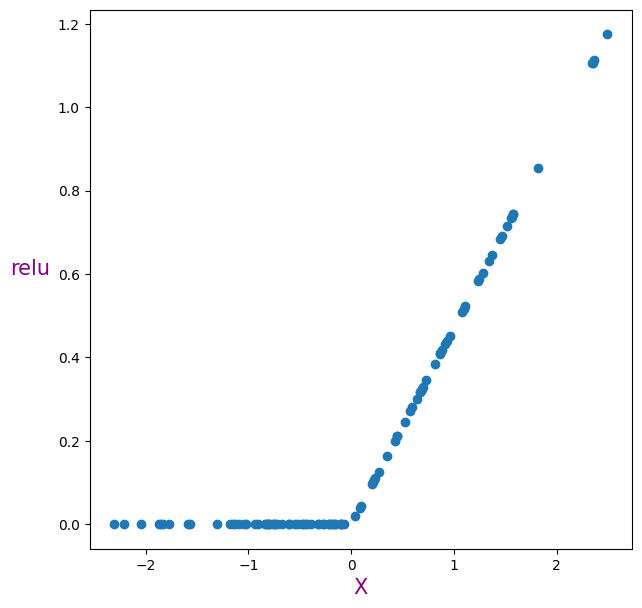

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.math import maximum

X = tf.random.normal(shape=(100,1))

dense = Dense(units=1)
Y = dense(X)
Y = maximum(0, Y)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X, Y)
ax.set_xlabel('X', fontsize=15, color='purple')
ax.set_ylabel('relu', fontsize=15, color='purple', rotation=0, labelpad=20)

# 3-2: Logistic Regression Models


### Code.3-2-1: Single-variate Logistic Regression Models

<ipython-input-52-d2e30618c542>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


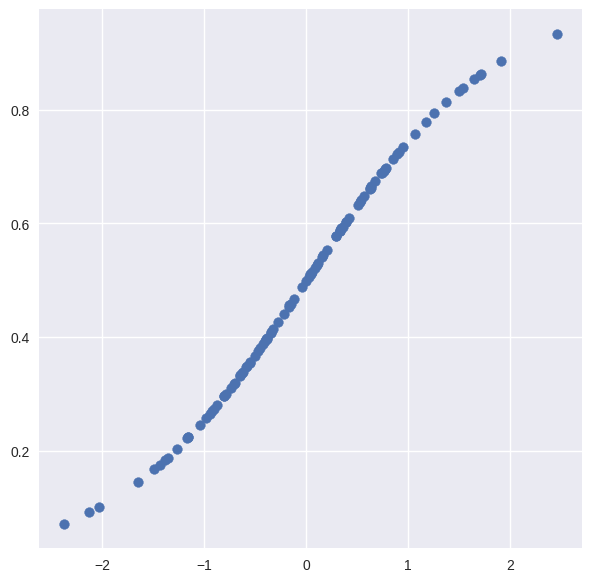

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100, 1))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

# W, b에 따라서 그래프 모양이 계속 다르게 나올 것.
# W : 좌우대칭 형태 결정
# b : 평행이동


### Code.3-2-2: Multi-variate Logistic Regression Models

<ipython-input-1-4c87a2f51795>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(100, 1)


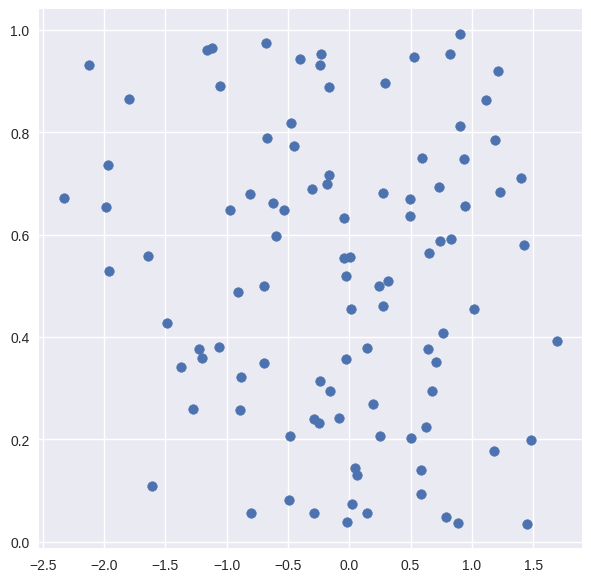

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

X = tf.random.normal(shape=(100,5))
dense = Dense(units=1, activation='sigmoid')

Y = dense(X)
print(Y.shape)

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X[:,0].numpy().flatten(), Y.numpy().flatten())

# 3-3: Binary Classifier with Dense Layers

### Code.3-3-1: Binary Classifier with Dense Layers

# 3-4: Softmax Layers

### Code.3-4-1: IO(Input and Output) of Softmax

### Code.3-4-2: Softmax in Dense Layers

# 3-5: Multi-class Classifiers

### Code.3-5-1: Multi-class Classifiers

# 4-1: Datasets

### Code.4-1-1: Dataset for Regression

### Code.4-1-2: Dataset for Binary Classification

### Code. 4-1-3: Dataset for Multi-class Classification

### Code.4-1-4: Dataset for Multi-class Classification with One-hot Encoding

### Code.4-1-5: Dataset Objects